1. 데이터 Loading

In [18]:
import pandas as pd

# 1. 데이터 Loading
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

# 데이터 미리 보기
print(df.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


2. 데이터 전처리(preprocessing), Feature 추출


In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Feature와 Label 분리
X = df[["Age", "EstimatedSalary"]].values
y = df["Purchased"].values

# 정규화 (Standardization: 평균 0, 표준편차 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 결과 확인
print("정규화된 X (앞 5개):\n", X_scaled[:5])
print("y (앞 5개):\n", y[:5])


정규화된 X (앞 5개):
 [[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]]
y (앞 5개):
 [0 0 0 0 0]


3. 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용


In [20]:
from sklearn.model_selection import train_test_split

# 전체 데이터에서 80%는 학습용, 20%는 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 2)
X_test shape: (80, 2)
y_train shape: (320,)
y_test shape: (80,)


4. 학습데이터에 대해 로지스틱회귀 모델 구성

In [21]:
# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 손실 함수 정의 (Cross Entropy)
def compute_cost(X, y, w):
    m = len(y)
    z = np.dot(X, w)
    h = sigmoid(z)
    epsilon = 1e-10  # log(0) 방지용
    cost = - (1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost
# 절편항 추가
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # shape: (320, 3)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])    # shape: (80, 3)


5. 경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력 print(w0, w1
, w2
)

In [22]:
# 학습률(learning rate) 및 반복 횟수 설정
learning_rate = 0.1
num_iterations = 1000

# 초기 파라미터 설정 (w0, w1, w2)
w = np.zeros((X_train_bias.shape[1],))  # shape: (3,)

# 손실 기록용
cost_history = []

# 경사하강법 반복
for i in range(num_iterations):
    z = np.dot(X_train_bias, w)
    h = sigmoid(z)

    # Gradient 계산
    gradient = np.dot(X_train_bias.T, (h - y_train)) / y_train.shape[0]

    # 파라미터 업데이트
    w -= learning_rate * gradient

    # 손실 계산
    cost = compute_cost(X_train_bias, y_train, w)
    cost_history.append(cost)

    # 중간 결과 출력 (선택사항)
    if i % 100 == 0:
        print(f"Step {i}: Cost = {cost:.4f}")
print("\n학습 완료 후 최종 파라미터:")
print(f"w0 = {w[0]:.4f}, w1 = {w[1]:.4f}, w2 = {w[2]:.4f}")


Step 0: Cost = 0.6807
Step 100: Cost = 0.4068
Step 200: Cost = 0.3834
Step 300: Cost = 0.3770
Step 400: Cost = 0.3747
Step 500: Cost = 0.3737
Step 600: Cost = 0.3732
Step 700: Cost = 0.3730
Step 800: Cost = 0.3729
Step 900: Cost = 0.3729

학습 완료 후 최종 파라미터:
w0 = -1.0889, w1 = 2.1428, w2 = 1.1919


6. 모델의 시각화

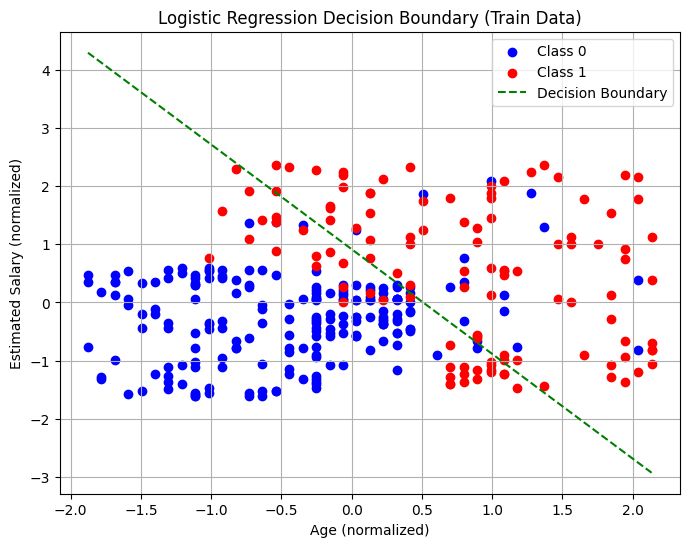

In [23]:
import matplotlib.pyplot as plt

# 학습 데이터의 정규화된 x1, x2
x1 = X_train[:, 0]
x2 = X_train[:, 1]

# 분류 결과에 따른 색상
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_train == 0], x2[y_train == 0], color='blue', label='Class 0')
plt.scatter(x1[y_train == 1], x2[y_train == 1], color='red', label='Class 1')

# 결정 경계선 그리기
# w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_boundary = -(w[0] + w[1]*x1_range) / w[2]
plt.plot(x1_range, x2_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Age (normalized)')
plt.ylabel('Estimated Salary (normalized)')
plt.title('Logistic Regression Decision Boundary (Train Data)')
plt.legend()
plt.grid(True)
plt.show()


7. scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력 print(w0, w1
, w2
)

In [24]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 파라미터 출력 (w0, w1, w2)
print("scikit-learn 모델 파라미터:")
print(f"w0 (intercept) = {clf.intercept_[0]:.4f}")
print(f"w1, w2 (coefficients) = {clf.coef_[0][0]:.4f}, {clf.coef_[0][1]:.4f}")


scikit-learn 모델 파라미터:
w0 (intercept) = -1.0529
w1, w2 (coefficients) = 2.0125, 1.1232


8. 모델의 시각화

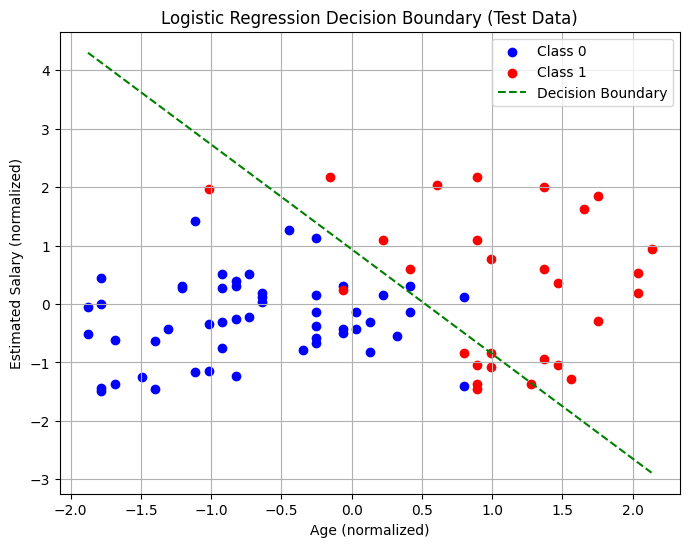

In [25]:
# 테스트 데이터의 정규화된 x1, x2
x1_test = X_test[:, 0]
x2_test = X_test[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x1_test[y_test == 0], x2_test[y_test == 0], color='blue', label='Class 0')
plt.scatter(x1_test[y_test == 1], x2_test[y_test == 1], color='red', label='Class 1')

# 결정 경계선: w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2
x1_range = np.linspace(x1_test.min(), x1_test.max(), 100)
w0_sklearn = clf.intercept_[0]
w1_sklearn = clf.coef_[0][0]
w2_sklearn = clf.coef_[0][1]
x2_boundary = -(w0_sklearn + w1_sklearn * x1_range) / w2_sklearn

plt.plot(x1_range, x2_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Age (normalized)')
plt.ylabel('Estimated Salary (normalized)')
plt.title('Logistic Regression Decision Boundary (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


(평가외 추가 코딩) 로지스틱회귀로 얻은 예측값(y_pred)을 테스트 데이터로 평가해보기

In [26]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)  # ← 로지스틱 회귀 예측 결과
accuracy = accuracy_score(y_test, y_pred)  # ← 테스트 데이터 정확도 평가

print(f"테스트 데이터에 대한 정확도: {accuracy:.4f}")


테스트 데이터에 대한 정확도: 0.8625
